In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
# Нормализация изображений
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [9]:
# One-hot encoding для меток
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Функция для создания модели
def create_model(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(28 * 28,)))
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Соотношения выборок
ratios = [(10, 90), (20, 80), (30, 70), (40, 60), (50, 50),
          (60, 40), (70, 30), (80, 20), (90, 10)]

# Количество скрытых слоев
hidden_layers_options = [0, 1, 5]

# Словарь для хранения результатов
results = {
    'train_ratio': [],
    'hidden_layers': [],
    'train_accuracy': [],
    'test_accuracy': []
}

# Обучение и тестирование моделей
for train_ratio, test_ratio in ratios:
    train_size = int(len(x_train) * train_ratio / 100)
    x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, train_size=train_size, random_state=42)

    for num_layers in hidden_layers_options:
        model = create_model(num_layers)
        history = model.fit(x_train_subset, y_train_subset, epochs=5, batch_size=32, verbose=0,
                            validation_data=(x_test, y_test))
        train_acc = history.history['accuracy'][-1] * 100  # Увеличение масштаба для наглядности
        test_acc = history.history['val_accuracy'][-1] * 100  # Увеличение масштаба для наглядности

        # Сохранение результатов
        results['train_ratio'].append(train_ratio)
        results['hidden_layers'].append(num_layers)
        results['train_accuracy'].append(train_acc)
        results['test_accuracy'].append(test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


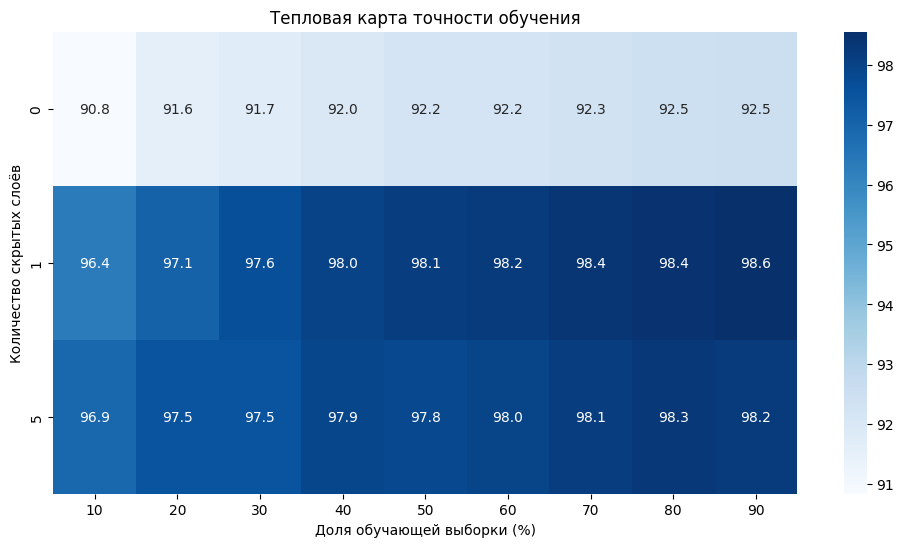

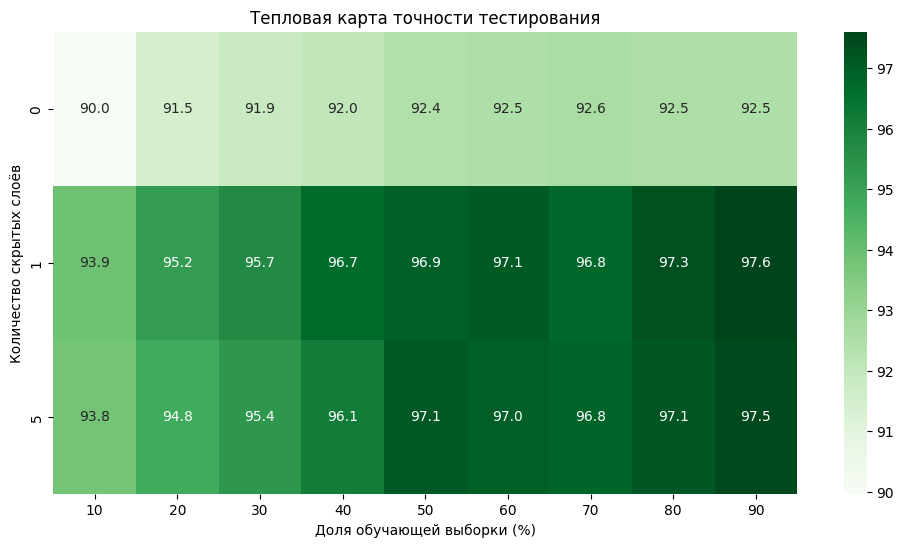

In [10]:
# Построение графиков
train_ratios = np.array(sorted(set(results['train_ratio'])))
hidden_layers = np.array(sorted(set(results['hidden_layers'])))

# Преобразование данных в формат для построения тепловой карты
heatmap_data_train = np.zeros((len(hidden_layers), len(train_ratios)))
heatmap_data_test = np.zeros((len(hidden_layers), len(train_ratios)))

for i, num_layers in enumerate(hidden_layers):
    for j, train_ratio in enumerate(train_ratios):
        idx = (np.array(results['hidden_layers']) == num_layers) & (np.array(results['train_ratio']) == train_ratio)
        heatmap_data_train[i, j] = np.mean(np.array(results['train_accuracy'])[idx])
        heatmap_data_test[i, j] = np.mean(np.array(results['test_accuracy'])[idx])

# Визуализация тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_train, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=train_ratios, yticklabels=hidden_layers)
plt.title('Тепловая карта точности обучения')
plt.xlabel('Доля обучающей выборки (%)')
plt.ylabel('Количество скрытых слоёв')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_test, annot=True, fmt=".1f", cmap="Greens",
            xticklabels=train_ratios, yticklabels=hidden_layers)
plt.title('Тепловая карта точности тестирования')
plt.xlabel('Доля обучающей выборки (%)')
plt.ylabel('Количество скрытых слоёв')
plt.show()